<a href="https://colab.research.google.com/github/nehaal10/recomender-system/blob/main/Recommender_System_Content_based_filtering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer,MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import regex as re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import sigmoid_kernel

In [60]:
data=pd.read_csv('/content/drive/MyDrive/Dataset/tmdb_5000_movies.csv')
data

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [ ]:
missing_total=data.isnull().sum().sort_values(ascending=False)
percent=(missing_total/len(data))*100

data_missing=pd.concat([missing_total,percent],keys=['total','percent'],axis=1)
data_missing

,total,percent
homepage,3091,64.355611
tagline,844,17.572351
overview,3,0.062461
runtime,2,0.041641
release_date,1,0.020820
vote_count,0,0.000000
genres,0,0.000000
id,0,0.000000
keywords,0,0.000000
original_language,0,0.000000


In [ ]:
missing_col=list(data_missing[data_missing['total']>0].index)

# visualizing null values vs normal values

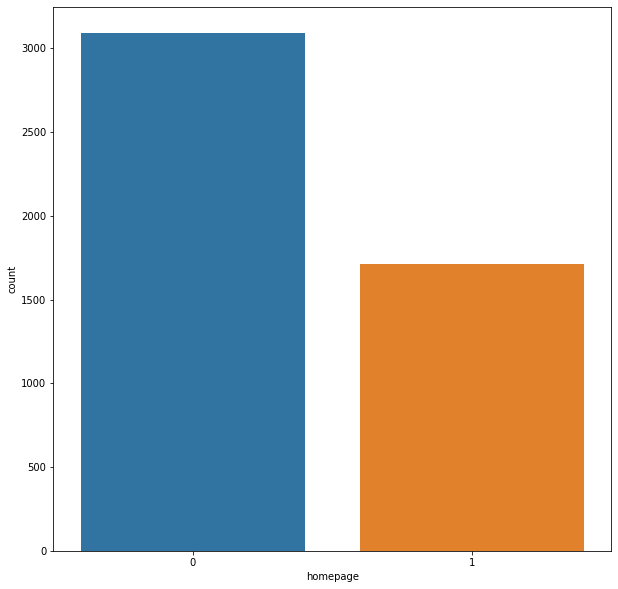

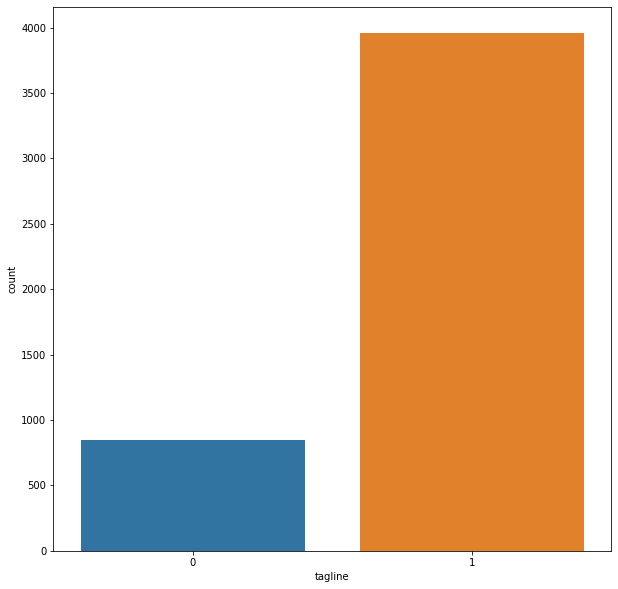

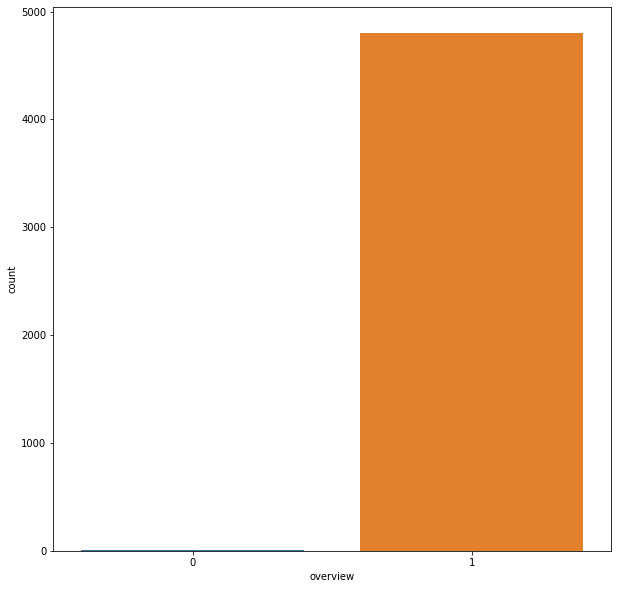

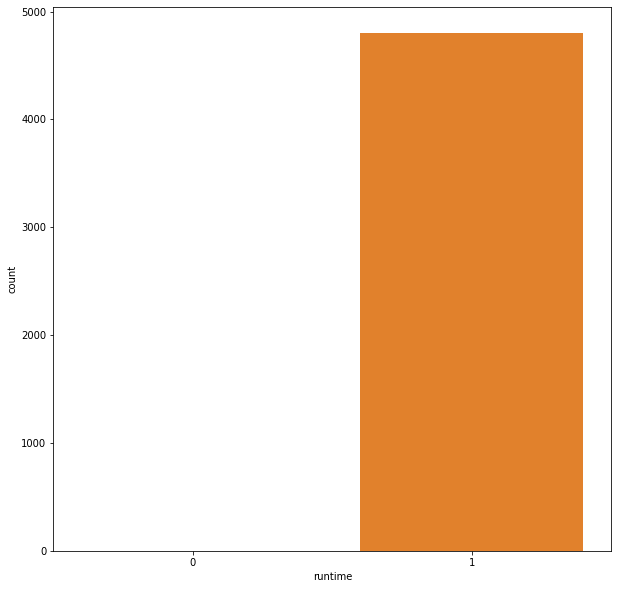

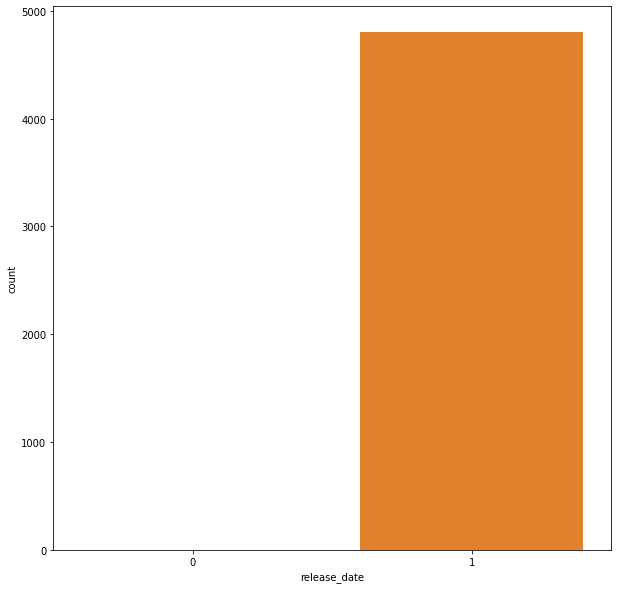

In [ ]:
data_set=data.copy()
data_set=(data_set.notnull()).astype('int')
for num,i in enumerate(missing_col):
  plt.figure(num+1,figsize=(10,10))
  sns.countplot(x=data_set[i])

# visualizing numerical data

In [ ]:
numeric_col=list(data.select_dtypes(include=['int64','float64']).columns)
numeric_col.pop(1)
numeric_col

['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

<Figure size 432x288 with 0 Axes>

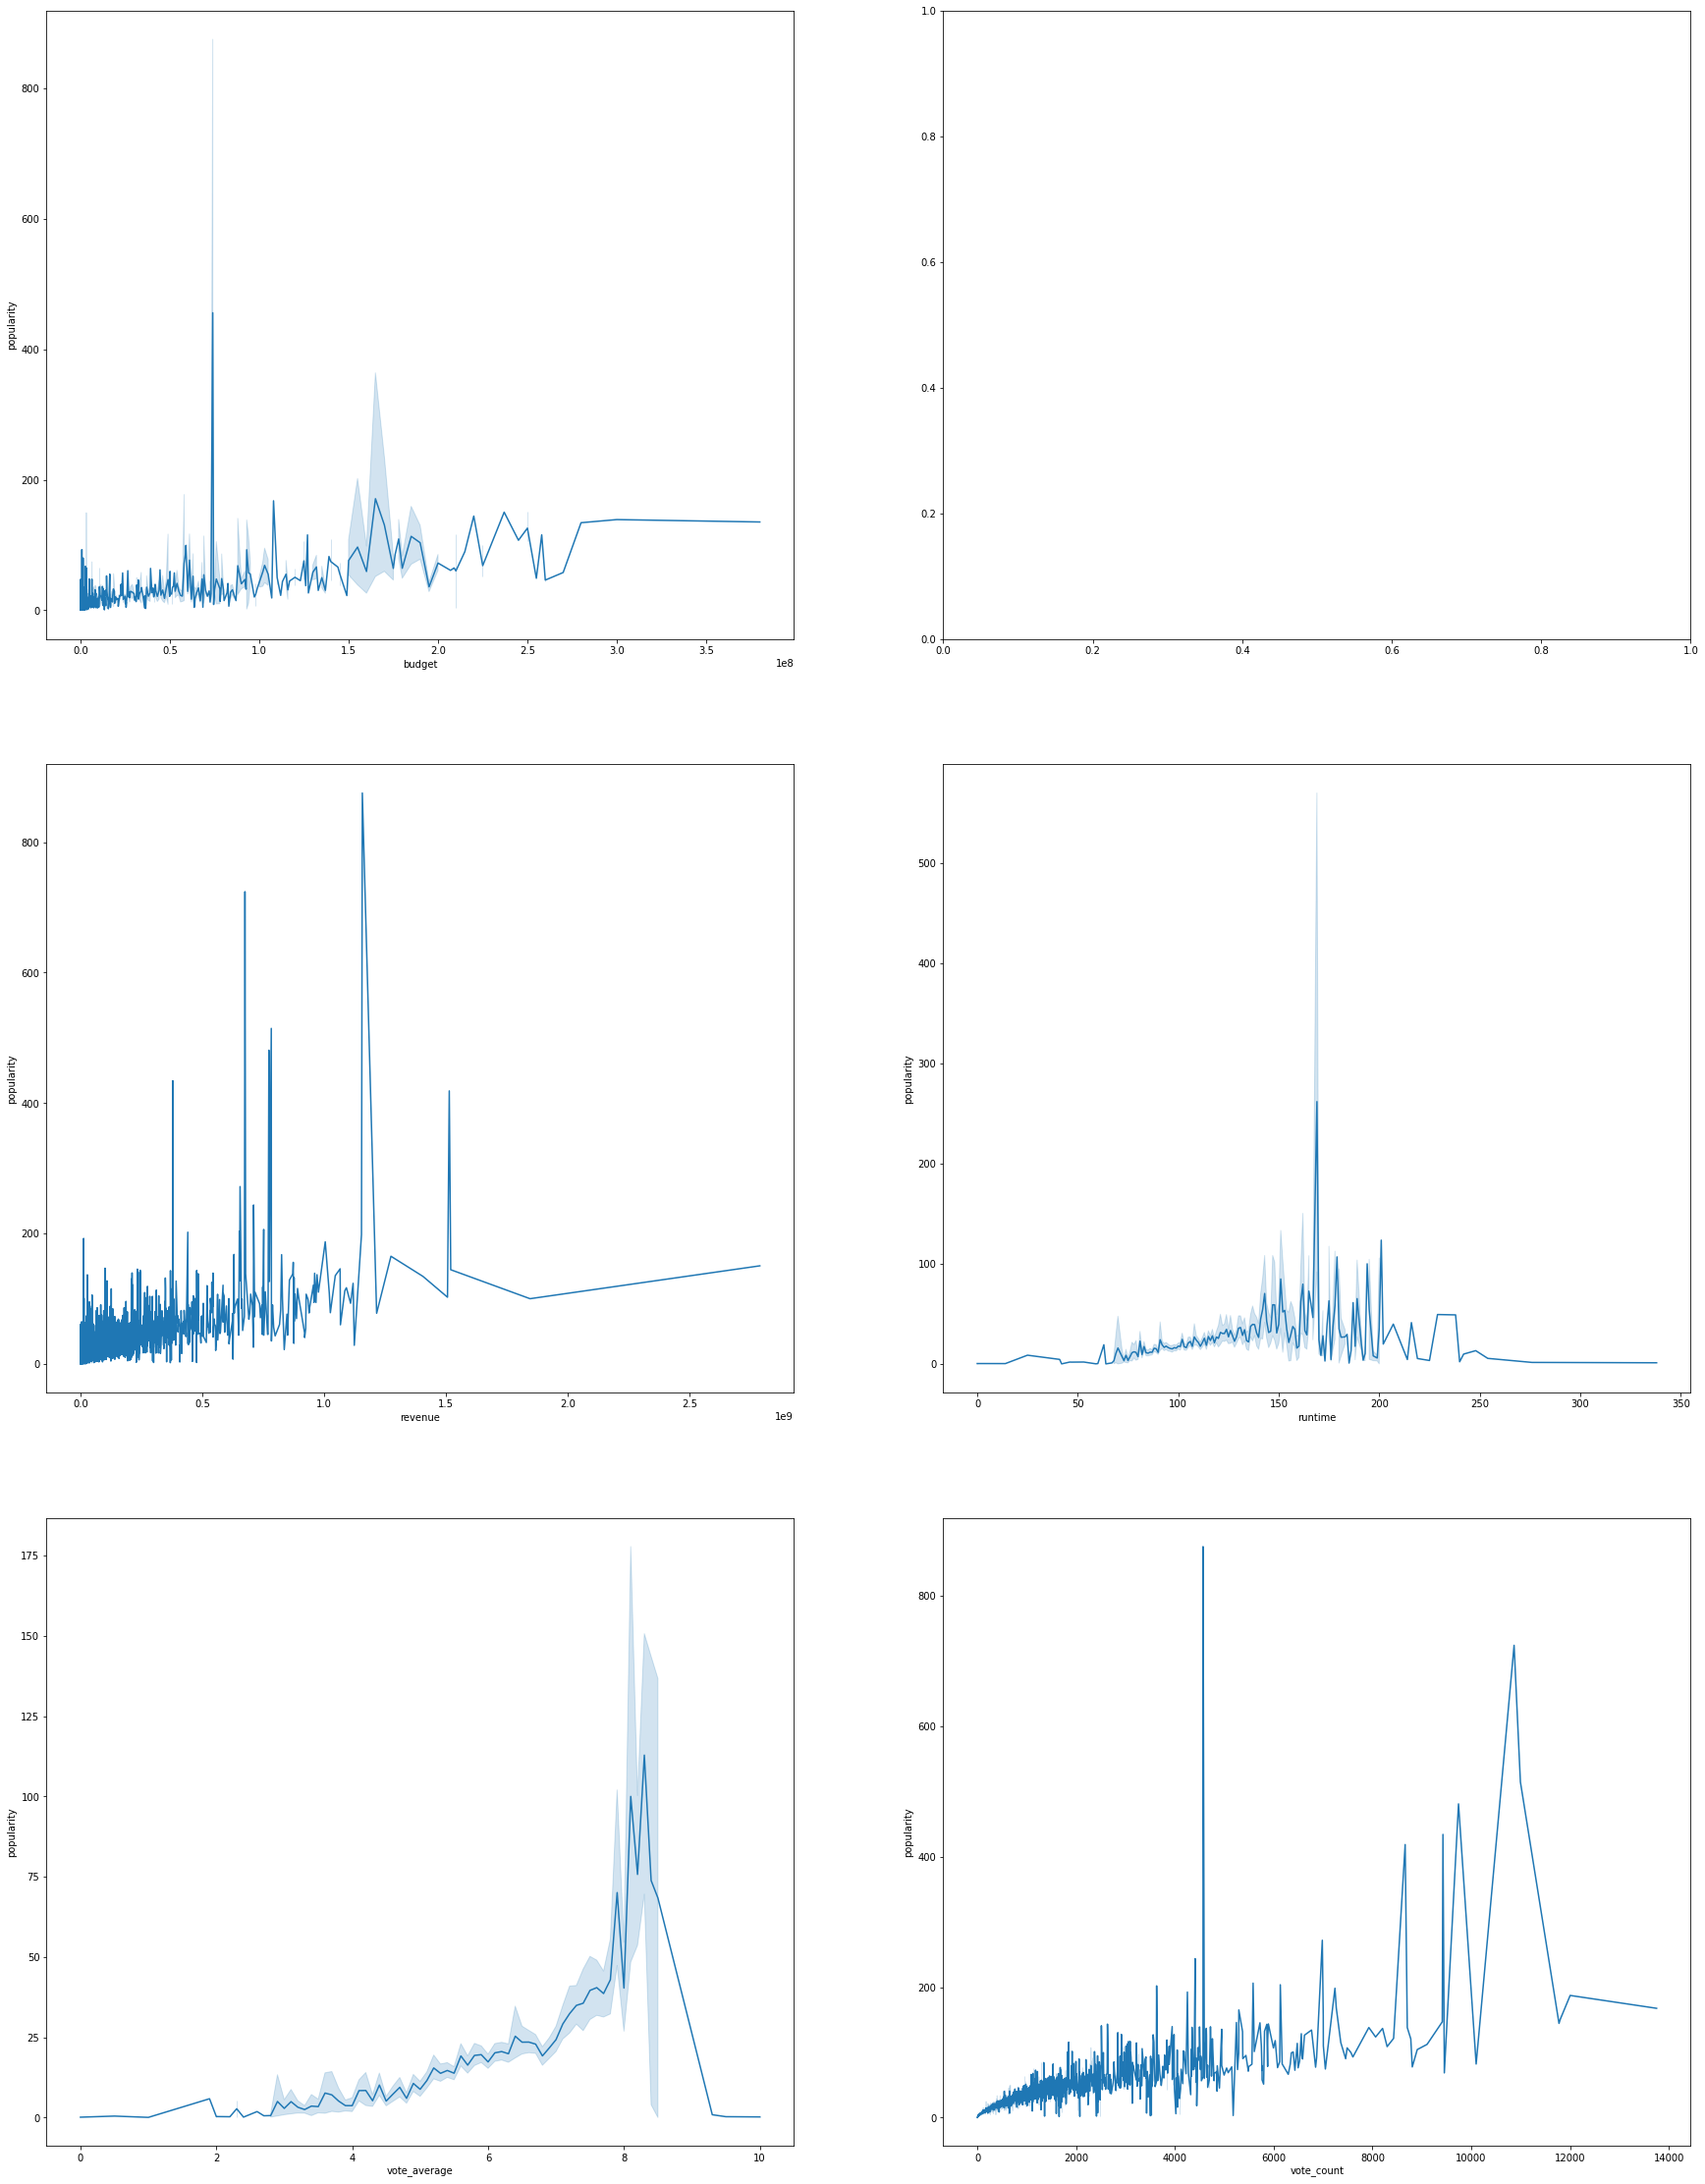

In [ ]:
plt.figure()
fig , ax =plt.subplots(3,2,figsize=(30,40))
for num,i in enumerate(numeric_col):
  plt.subplot(3,2,num+1)
  if i != numeric_col[1]:
    sns.lineplot(x=i,y='popularity',data=data)


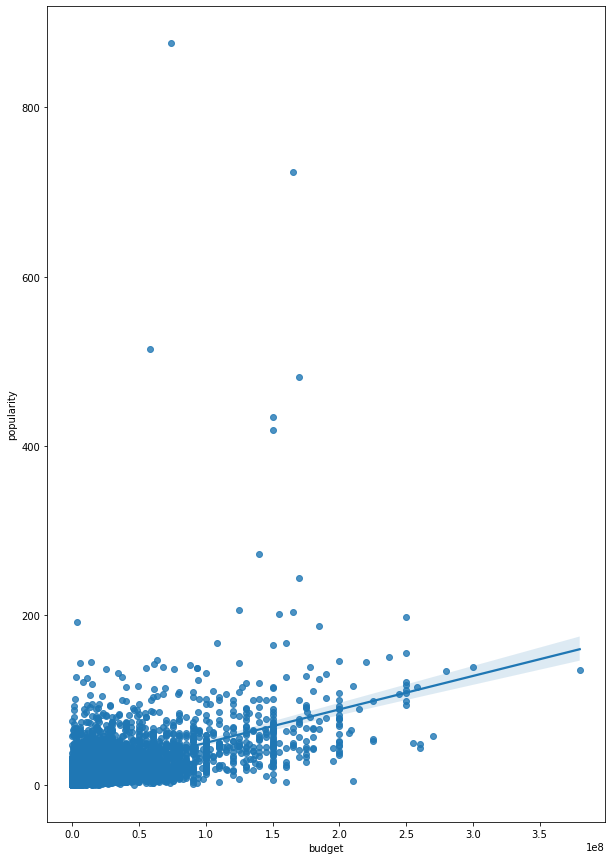

<Figure size 720x1080 with 0 Axes>

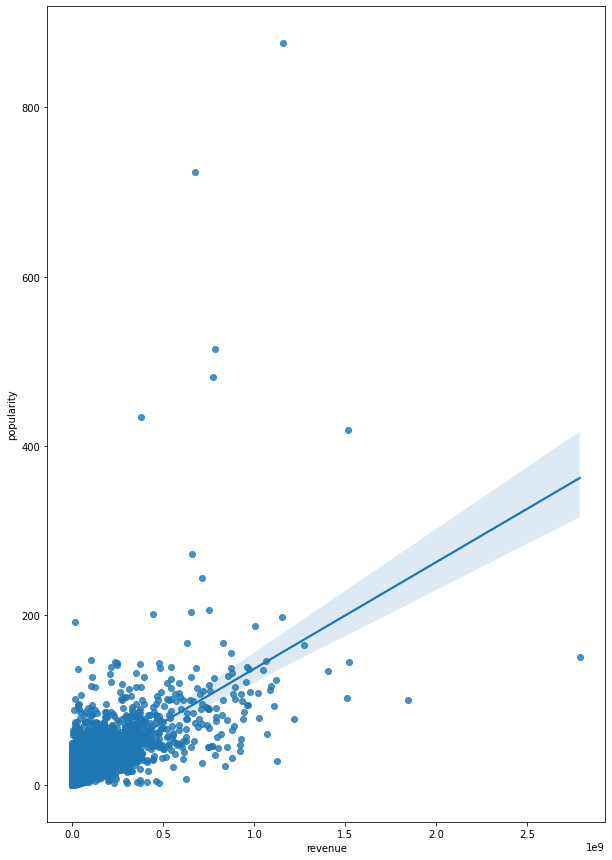

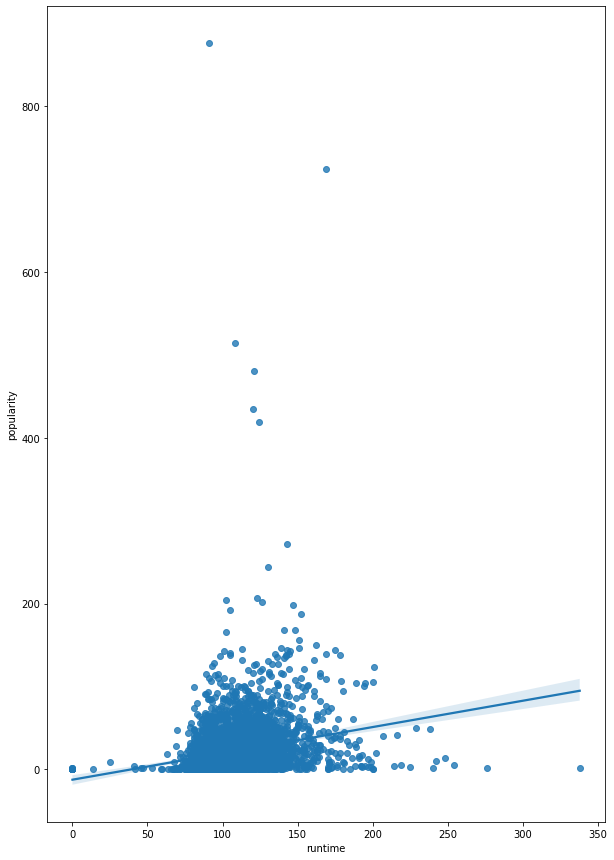

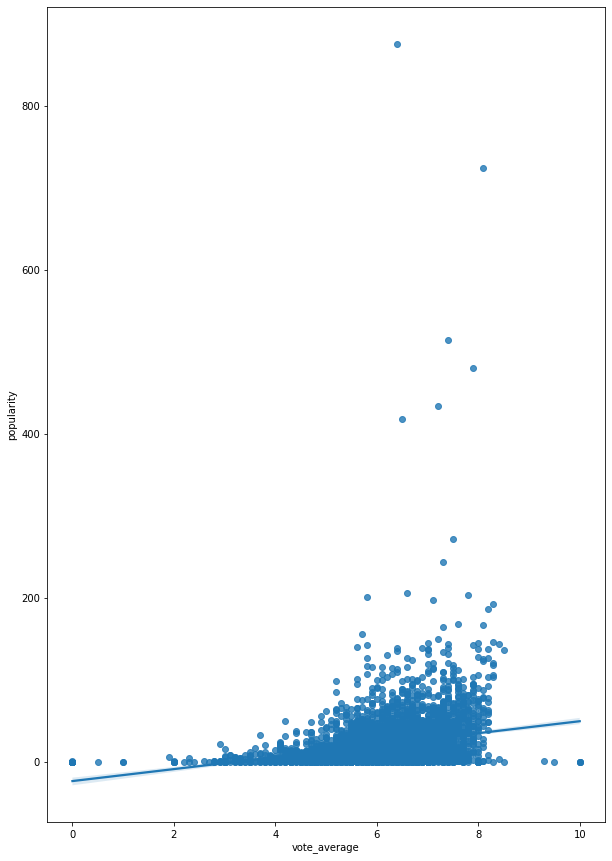

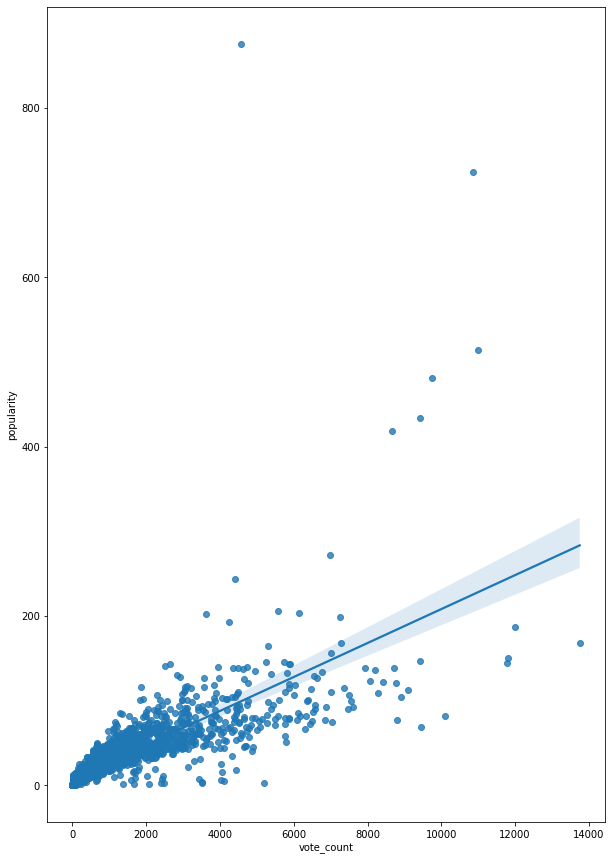

In [ ]:

plt.figure(figsize=(10,15))
for num,i in enumerate(numeric_col):
  plt.figure(num+1,figsize=(10,15))
  if i != numeric_col[1]:
    sns.regplot(x=i,y='popularity',data=data)

# distplot/histograms to get more intiuation about the data

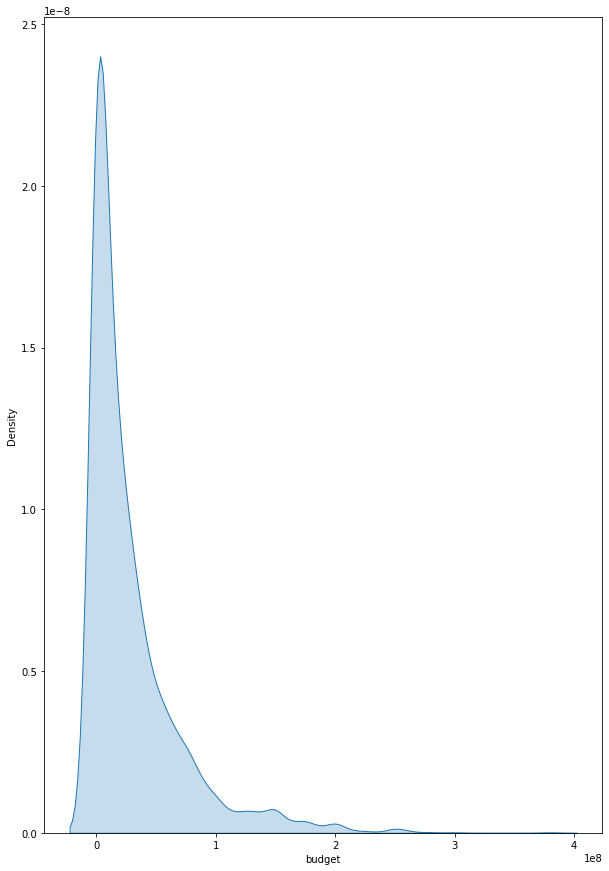

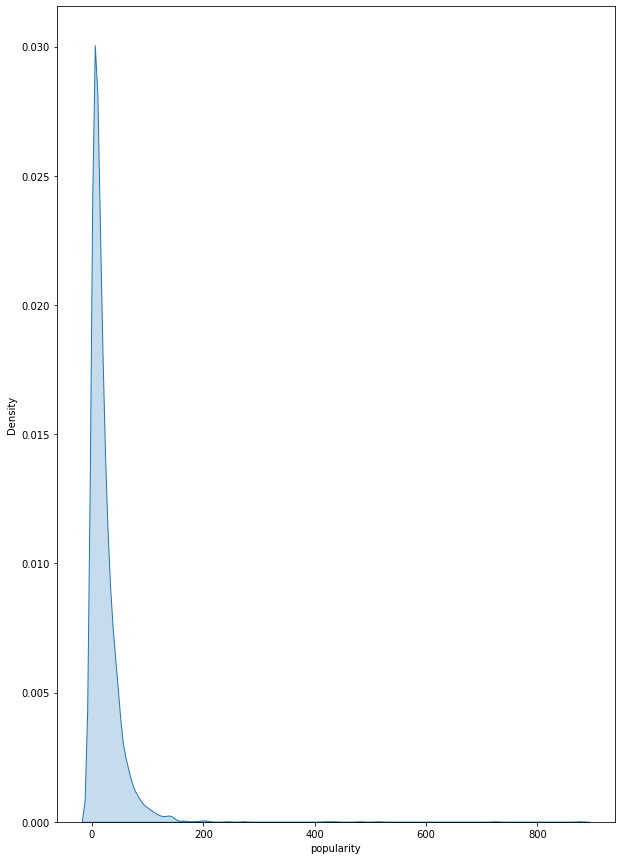

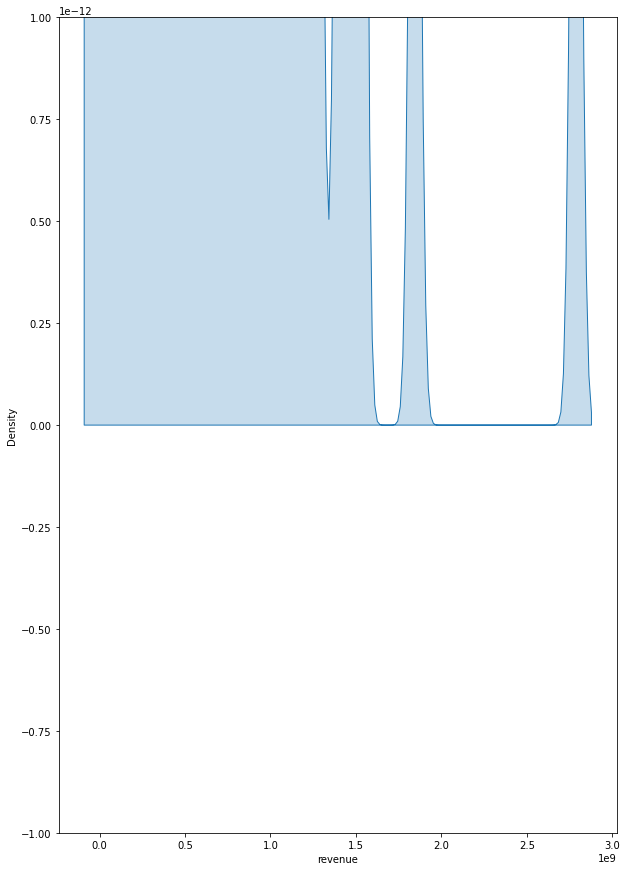

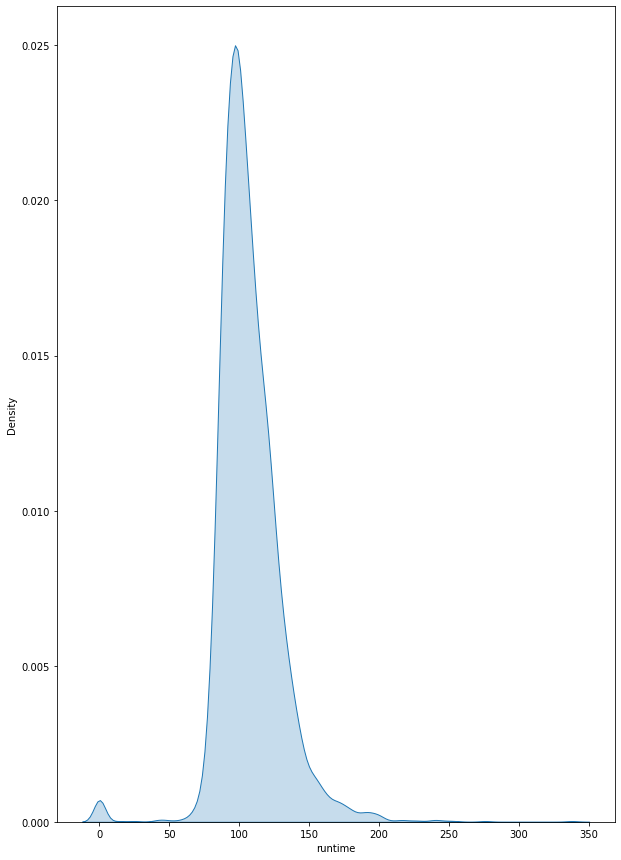

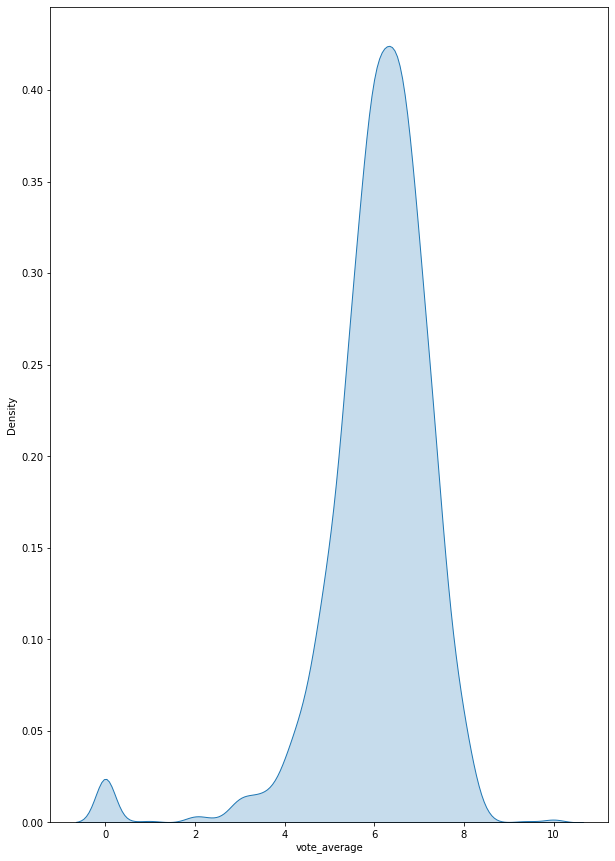

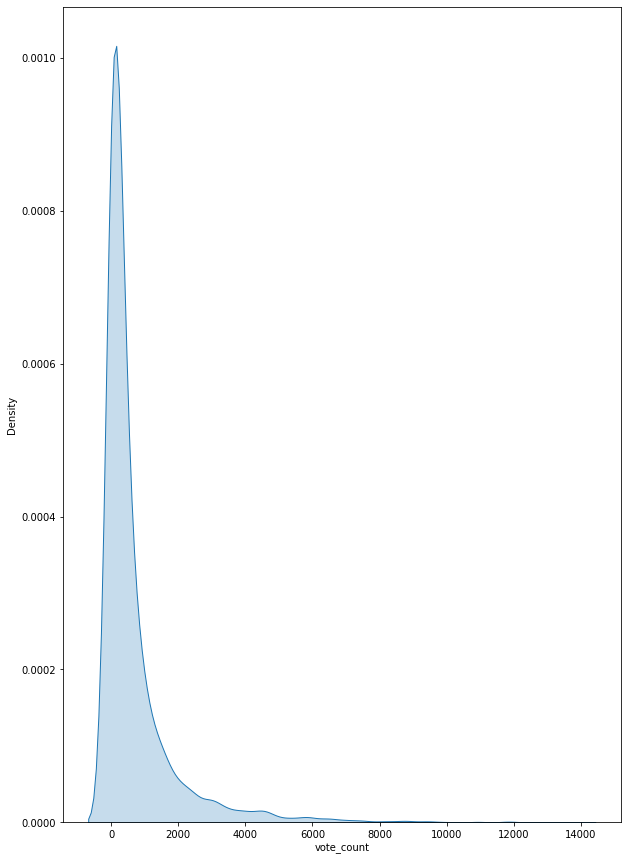

In [ ]:
plt.figure(figsize=(10,15))
for num,i in enumerate(numeric_col):
  plt.figure(num+1,figsize=(10,15))
  sns.kdeplot(x=i,data=data,shade='fill',cbar=True)

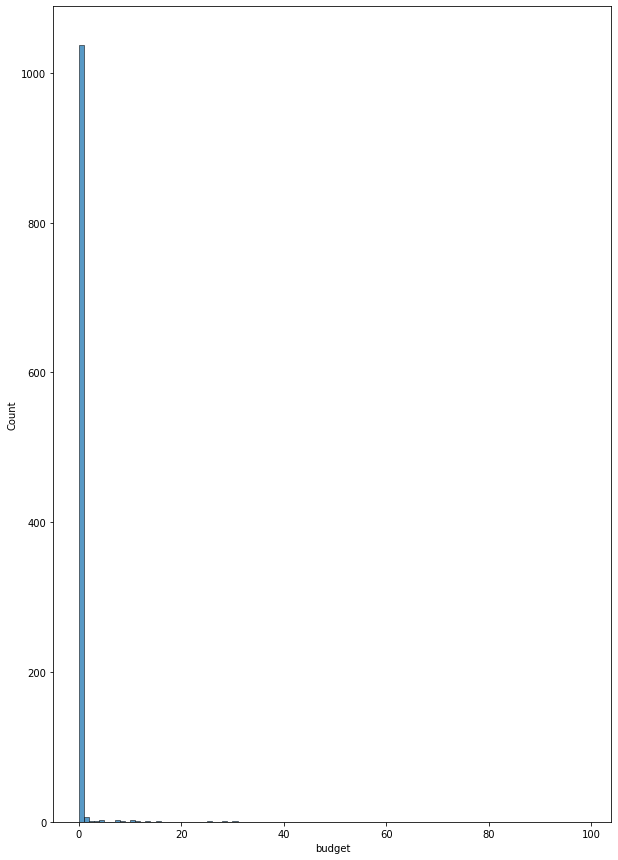

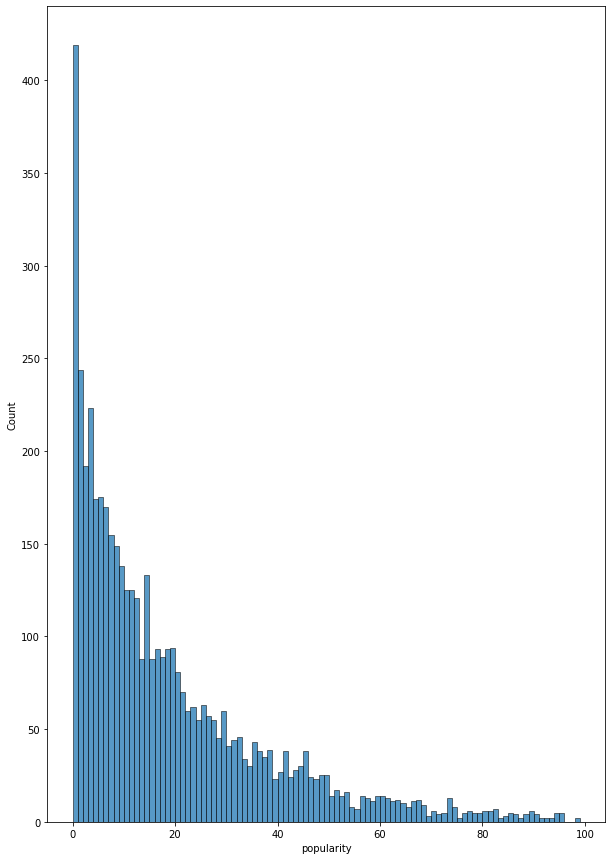

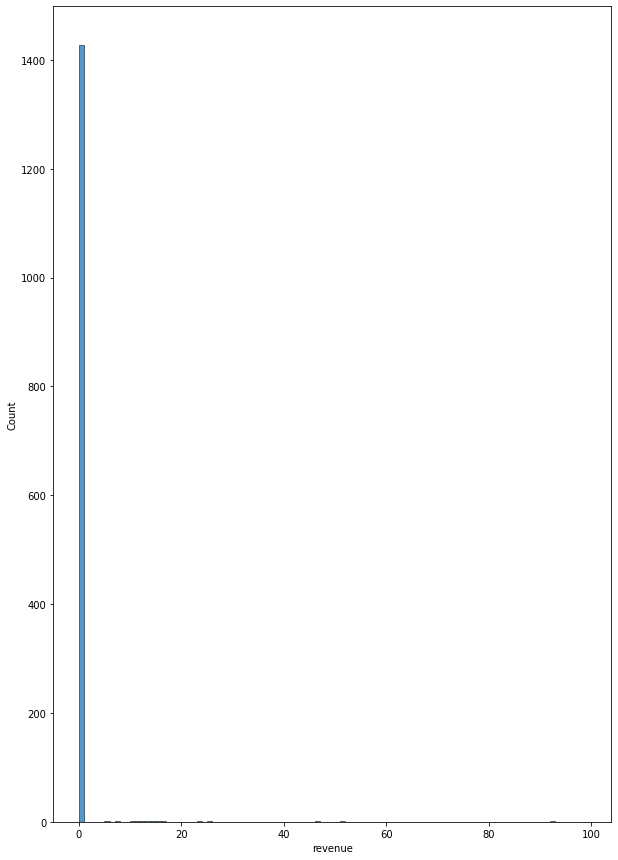

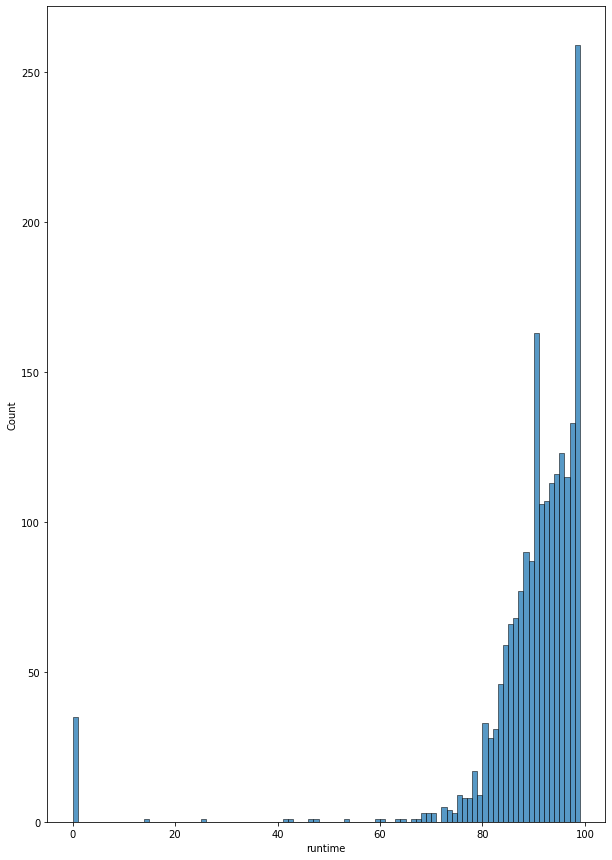

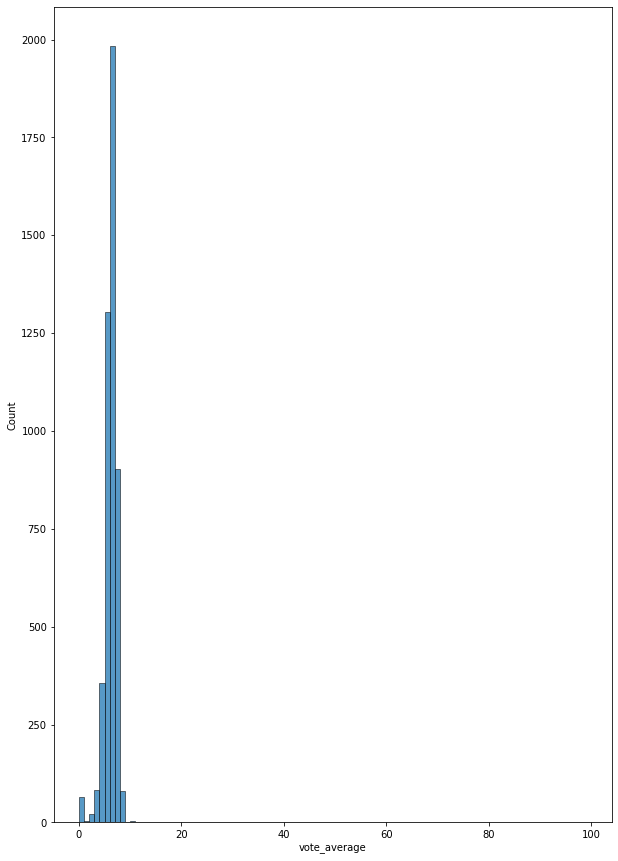

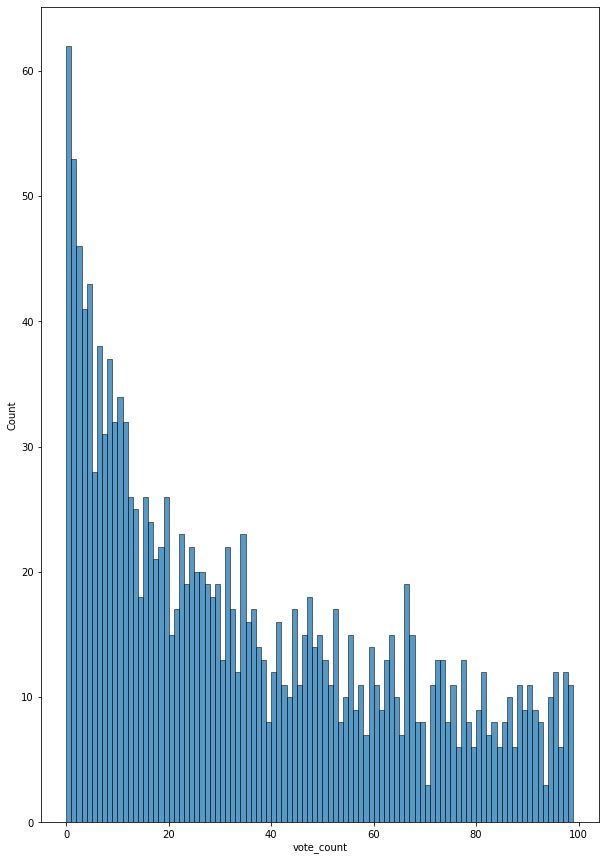

In [ ]:
plt.figure(figsize=(10,15))
for num,i in enumerate(numeric_col):
  plt.figure(num+1,figsize=(10,15))
  sns.histplot(x=i,bins=range(100),data=data)

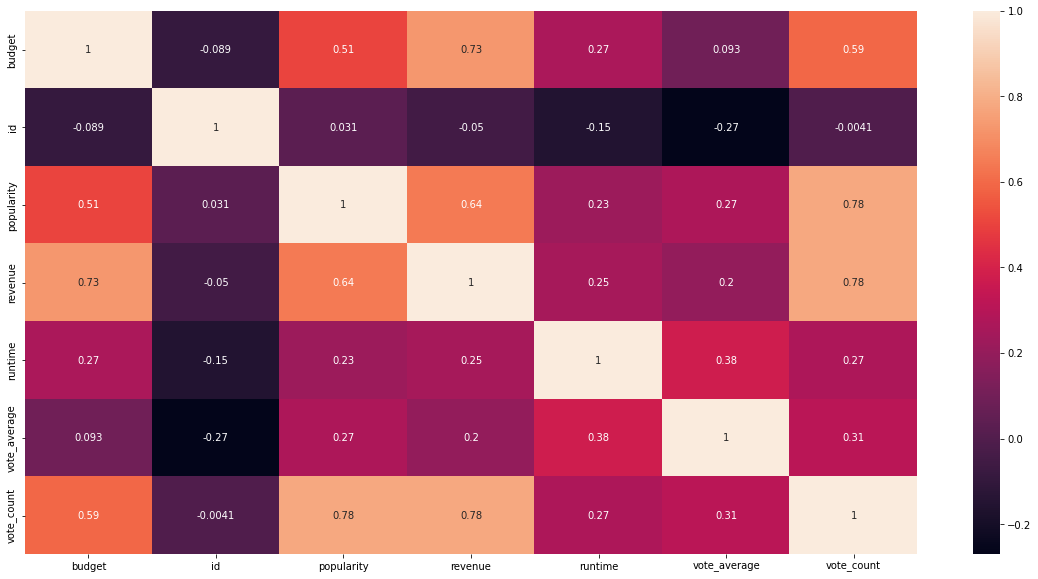

In [ ]:
corr=data.corr()
corr
plt.figure(figsize=(20,10))
sns.heatmap(data=corr,annot=True)

# with corelation we can concluede that our visualization is done

# now we start with data preprocessing

In [ ]:
data_missing

,total,percent
homepage,3091,64.355611
tagline,844,17.572351
overview,3,0.062461
runtime,2,0.041641
release_date,1,0.020820
vote_count,0,0.000000
genres,0,0.000000
id,0,0.000000
keywords,0,0.000000
original_language,0,0.000000


In [61]:
# droping unwanted columns
col=list(data.columns)
columns=[i for i in col if (i=='overview')or ( i=='title')]
data=data[columns]

In [62]:
# we will check for null values and remove rows with nan in overview

data=data[data['overview'].notna()]

In [63]:
data

,overview,title
0,"In the 22nd century, a paraplegic Marine is di...",Avatar
1,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,A cryptic message from Bond’s past sends him o...,Spectre
3,Following the death of District Attorney Harve...,The Dark Knight Rises
4,"John Carter is a war-weary, former military ca...",John Carter
...,...,...
4798,El Mariachi just wants to play his guitar and ...,El Mariachi
4799,A newlywed couple's honeymoon is upended by th...,Newlyweds
4800,"""Signed, Sealed, Delivered"" introduces a dedic...","Signed, Sealed, Delivered"
4801,When ambitious New York attorney Sam is sent t...,Shanghai Calling


In [83]:
ind=pd.Series(list(range(4799)),index=data['title'])


In [65]:
# regex
index=list(data.index)

for i in index:
  txt=data.loc[i]['overview']
  txt=re.sub(r'[^\w\s]','',txt)
  x=txt.split()
  if x==[]:
    data.drop(i,inplace=True)
  else:
    data.at[i,'overview']=txt
  

In [66]:
#nltk.download('punkt')
index=list(data.index)
for i in index:
  txt=data.loc[i,'overview']
  txt=nltk.word_tokenize(txt)
  data.at[i,'overview']=txt

In [67]:
nltk.download('stopwords')
for i in index:
  txt=data.loc[i,'overview']
  txt=[i for i in txt if i not in stopwords.words('english')]
  data.at[i,'overview']=txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
nltk.download('wordnet')
lem=WordNetLemmatizer()
for i in index:
  txt=data.loc[i,'overview']
  txt=[lem.lemmatize(i) for i in txt ]
  data.at[i,'overview']=txt

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:
for i in index:
  txt=data.loc[i,'overview']
  txt=' '.join(txt)
  txt=txt.lower()
  data.at[i,'overview']=txt

In [70]:
data

,overview,title
0,in 22nd century paraplegic marine dispatched m...,Avatar
1,captain barbossa long believed dead come back ...,Pirates of the Caribbean: At World's End
2,a cryptic message bonds past sends trail uncov...,Spectre
3,following death district attorney harvey dent ...,The Dark Knight Rises
4,john carter warweary former military captain w...,John Carter
...,...,...
4798,el mariachi want play guitar carry family trad...,El Mariachi
4799,a newlywed couple honeymoon upended arrival re...,Newlyweds
4800,signed sealed delivered introduces dedicated q...,"Signed, Sealed, Delivered"
4801,when ambitious new york attorney sam sent shan...,Shanghai Calling


In [98]:
vect=TfidfVectorizer(min_df=3,max_features=None,strip_accents='unicode',analyzer='word',ngram_range=(1,3))

tvf=vect.fit_transform(data['overview'])

In [99]:
sig=sigmoid_kernel(tvf,tvf)

In [104]:
def predict(title, sig=sig):
  indcies=ind[title]

  movie=sorted(list(enumerate(sig[indcies])),key=lambda x:x[1],reverse=True)
  movies=[data.loc[num]['title'] for num,i in movie[1:11]]
  print(movies[1:10])

In [106]:
predict('Spy Kids')

['Spy Kids: All the Time in the World', 'Spy Kids 3-D: Game Over', 'Adore', 'Bathing Beauty', 'Jimmy Neutron: Boy Genius', 'Escobar: Paradise Lost', 'Bend It Like Beckham', "It's a Mad, Mad, Mad, Mad World", 'Mr. 3000']
